In [1]:
import pandas as pd 
import numpy as np
print(np.__version__)

1.24.3


### EDA

In [2]:
rdata = pd.read_csv("/Users/houbowang/Desktop/sta 221/bank+marketing/bank-additional/bank-additional-full.csv", sep=";")
rdata.head()
#data is raw data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
rdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


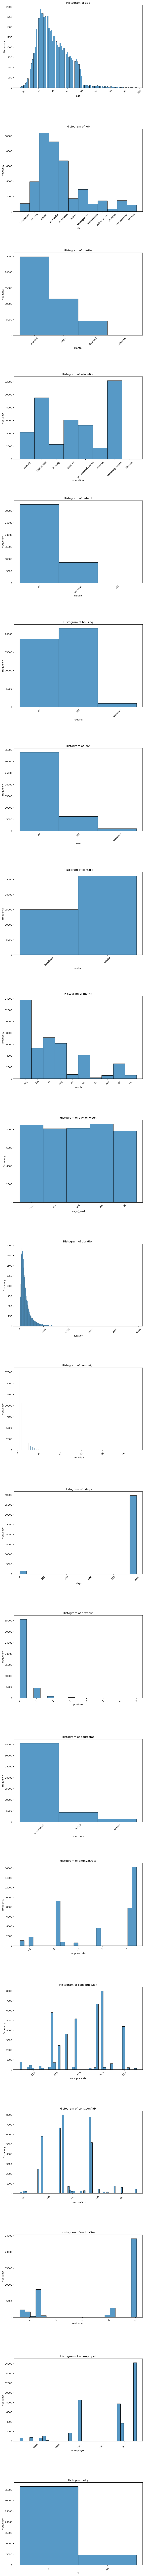

In [5]:
fig, axes = plt.subplots(nrows=21, ncols=1, figsize=(10, 200), subplot_kw=dict(aspect='auto'))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(rdata.columns):
    sns.histplot(rdata[variable], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')    
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

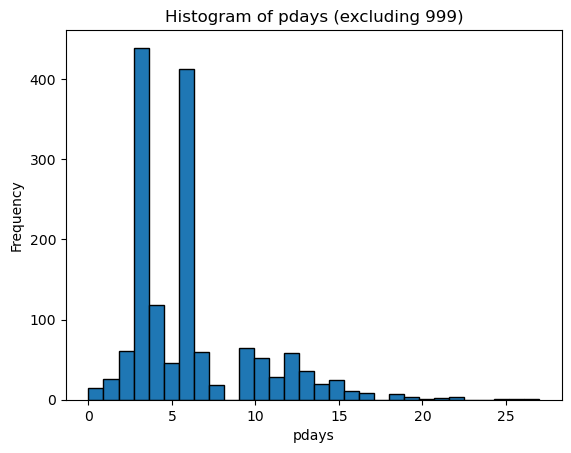

In [6]:
filtered_pdays = rdata['pdays'][rdata['pdays'] != 999]

# Plot the histogram
plt.hist(filtered_pdays, bins=30, edgecolor='black')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Histogram of pdays (excluding 999)')
plt.show()

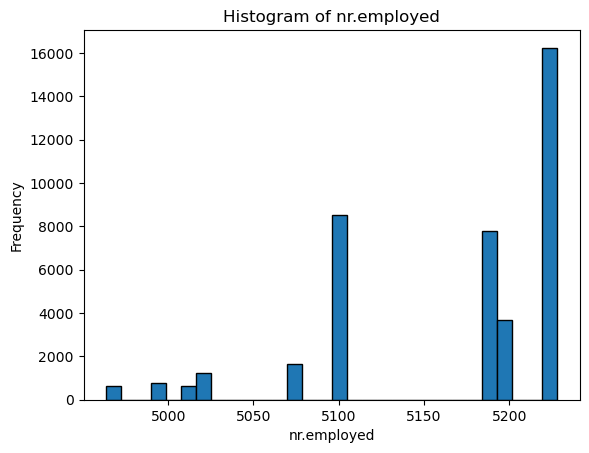

In [7]:
nemp = rdata['nr.employed']

# Plot the histogram in case the pdf is not clear
plt.hist(nemp, bins=30, edgecolor='black')
plt.xlabel('nr.employed')
plt.ylabel('Frequency')
plt.title('Histogram of nr.employed')
plt.show()

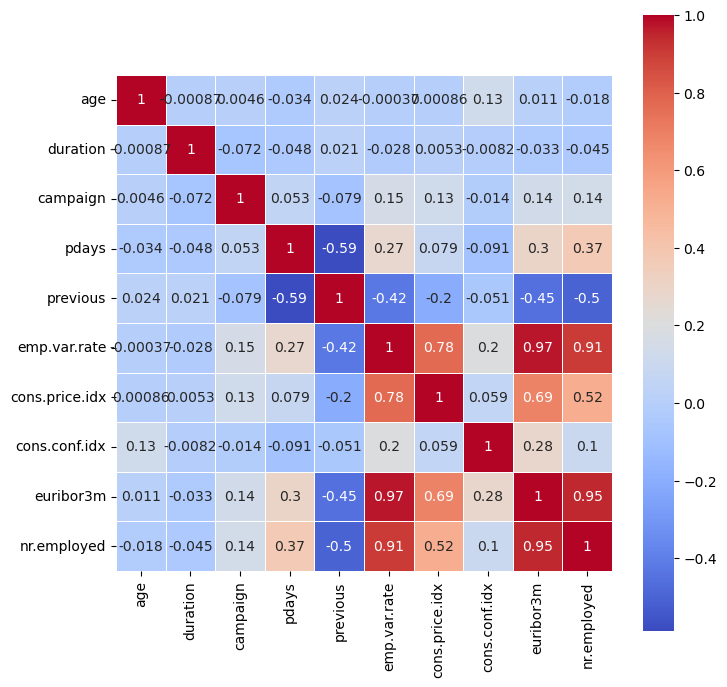

In [8]:
#corr matrix
numeric_data = rdata.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, square=True)
plt.show()

### Data Preprocessing

In [9]:
rdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#rdata.replace({'unknown': np.nan}, inplace=True)
#change unknown to missing values

In [11]:
rdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

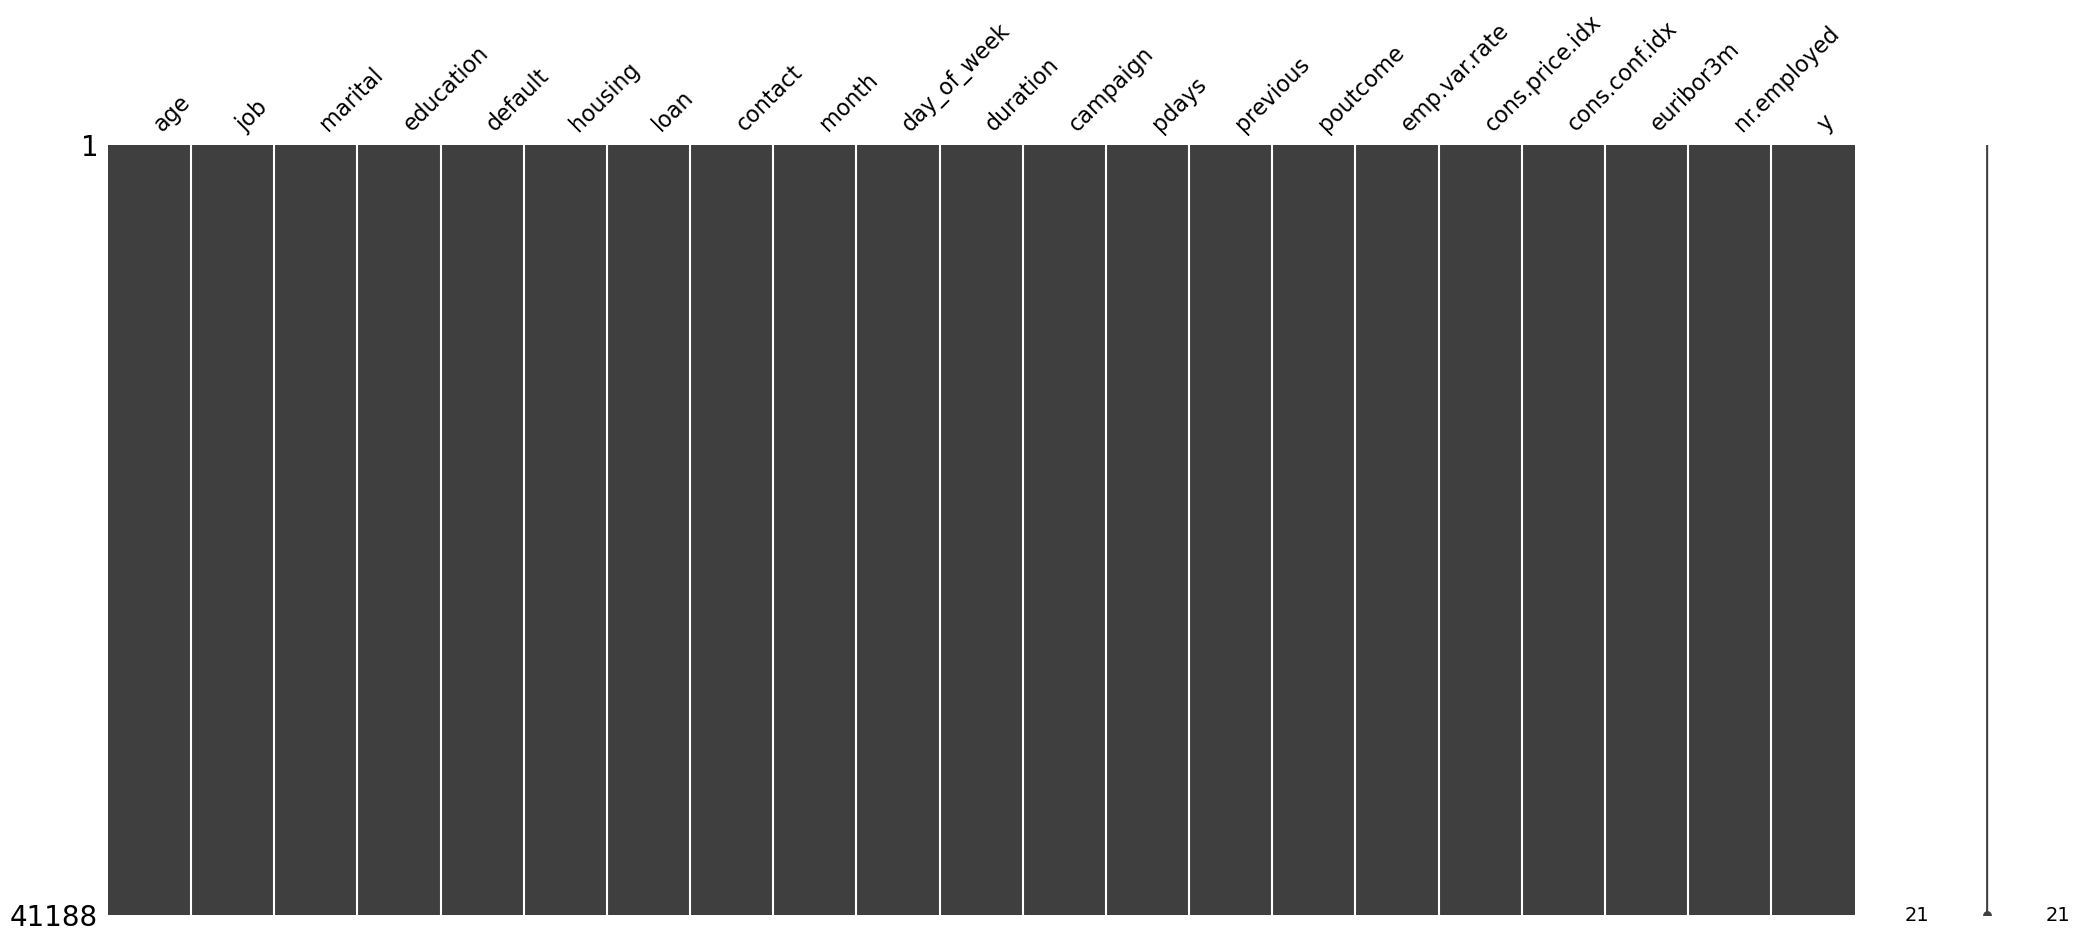

In [12]:
import missingno as msno 
msno.matrix(rdata)

In [13]:
data_cleaned = rdata.dropna()
data_cleaned.isnull().sum()
#delete missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

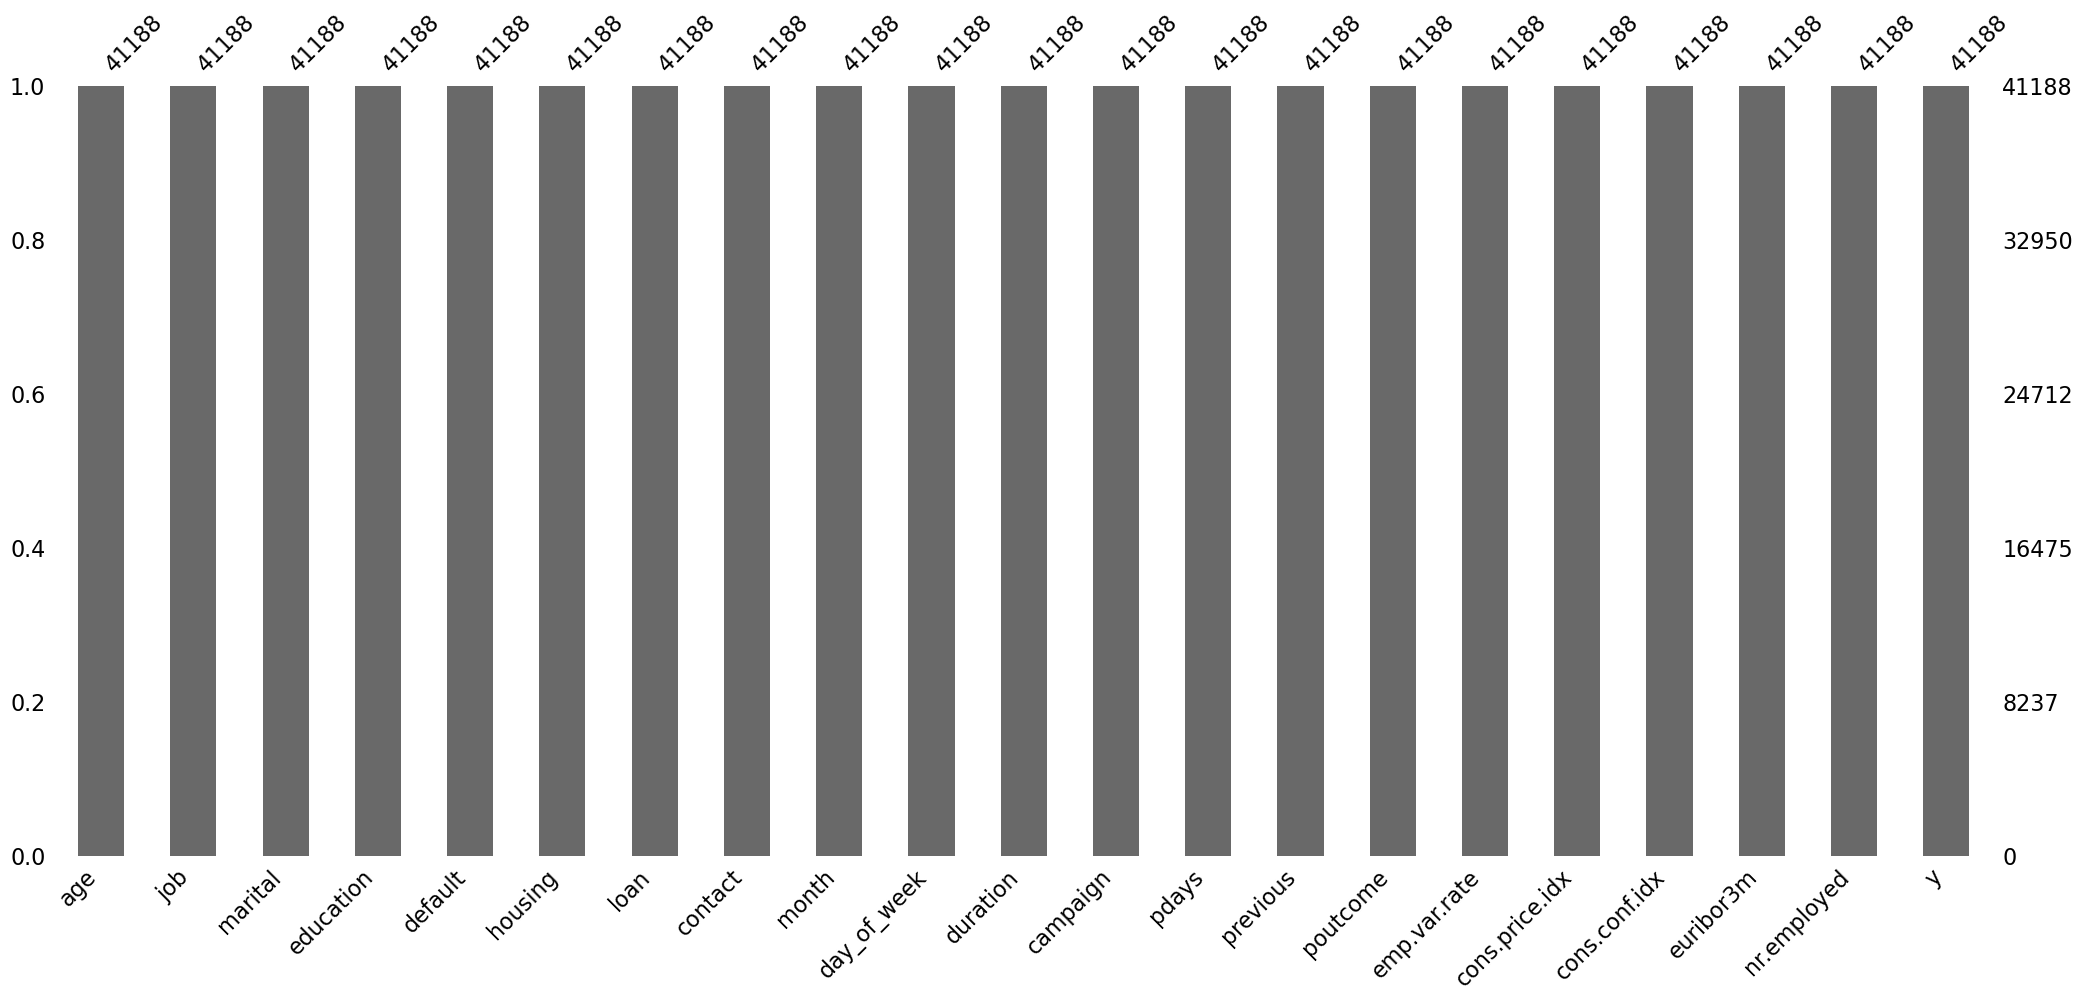

In [14]:
msno.bar(data_cleaned) 

In [15]:
data = data_cleaned.drop_duplicates()
data.shape
#delete duplicate

(41176, 21)

In [16]:
data['y'].replace({'yes': 1, 'no': 0}, inplace=True)
data
#transform y to numerical

/var/folders/dv/xq3vbg2x22zfk35z4q64z0br0000gn/T/ipykernel_83995/1615810483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'].replace({'yes': 1, 'no': 0}, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [17]:
data_x = data.iloc[:, :-1]
data_x['first_contact'] = (data_x['pdays'] == 999).astype(int)
#add first_contact varaible for pdays 999 issue
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)
#split estimator x's and target y

Shape of X: (41176, 21)
Shape of Y: (41176,)


In [18]:
categorical_feats = data_x.columns[data_x.dtypes==object].tolist()
categorical_feats

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
data_encoded = pd.get_dummies(data_x, columns=categorical_feats)
print(data_encoded.dtypes==object)
#one-hot encoding 

age                     False
duration                False
campaign                False
pdays                   False
previous                False
                        ...  
day_of_week_tue         False
day_of_week_wed         False
poutcome_failure        False
poutcome_nonexistent    False
poutcome_success        False
Length: 64, dtype: bool


data_encoded = pd.get_dummies(data_x, columns=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome'])
print(data_encoded.dtypes==object)
#one-hot encoding 

In [20]:
from sklearn.model_selection import train_test_split
random_seed = 7

X_temp, X_test, y_temp, y_test = train_test_split(data_encoded, data_y, test_size=0.2, random_state=random_seed)
X_train, X_cv, y_train, y_cv = train_test_split(X_temp, y_temp, test_size=0.2, random_state=random_seed)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 64)
X CV: (6588, 64)
X Test: (8236, 64)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


### Model1: Simple Logistic Regression

In [21]:
# with duration feature
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration feature is: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration feature is:  0.9198807188451217


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.feature_selection import RFE


In [23]:
#feature importance
model.fit(X_train, y_train)
coef_importance = pd.Series(model.coef_[0], index=X_train.columns)
selected_features_coef = coef_importance.abs().sort_values(ascending=False).index

print("\nFeature Importance based on Coefficients:")
print(selected_features_coef)


Feature Importance based on Coefficients:
Index(['euribor3m', 'emp.var.rate', 'cons.price.idx', 'campaign', 'month_may',
       'cons.conf.idx', 'contact_cellular', 'contact_telephone', 'default_no',
       'default_unknown', 'marital_single', 'job_blue-collar',
       'education_university.degree', 'marital_married', 'month_mar',
       'previous', 'job_admin.', 'month_apr', 'month_oct',
       'education_basic.9y', 'job_student', 'job_retired', 'month_jul',
       'poutcome_nonexistent', 'housing_yes', 'poutcome_failure', 'month_sep',
       'job_services', 'duration', 'education_basic.4y', 'month_jun',
       'housing_no', 'education_basic.6y', 'day_of_week_tue',
       'poutcome_success', 'education_unknown', 'month_nov',
       'marital_divorced', 'nr.employed', 'loan_no', 'day_of_week_wed',
       'month_dec', 'education_high.school', 'job_entrepreneur', 'month_aug',
       'age', 'day_of_week_fri', 'pdays', 'job_housemaid', 'job_unemployed',
       'job_self-employed', 'educati

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [25]:
order_feat = coef_importance.abs().sort_values(ascending=False)
print(order_feat)

euribor3m                        0.341865
emp.var.rate                     0.335074
cons.price.idx                   0.223413
campaign                         0.075696
month_may                        0.051971
cons.conf.idx                    0.050126
contact_cellular                 0.048369
contact_telephone                0.045225
default_no                       0.036554
default_unknown                  0.033401
marital_single                   0.028328
job_blue-collar                  0.027891
education_university.degree      0.026380
marital_married                  0.021533
month_mar                        0.019873
previous                         0.019043
job_admin.                       0.016366
month_apr                        0.014909
month_oct                        0.013771
education_basic.9y               0.013571
job_student                      0.012142
job_retired                      0.011616
month_jul                        0.009860
poutcome_nonexistent             0

In [26]:
print(coef_importance.abs().count())

64


In [27]:
print(coef_importance.sort_values(ascending=False))

cons.price.idx                   0.223413
cons.conf.idx                    0.050126
contact_cellular                 0.048369
default_no                       0.036554
marital_single                   0.028328
education_university.degree      0.026380
month_mar                        0.019873
previous                         0.019043
job_admin.                       0.016366
month_apr                        0.014909
month_oct                        0.013771
job_student                      0.012142
job_retired                      0.011616
housing_yes                      0.009201
poutcome_failure                 0.009009
month_sep                        0.008399
duration                         0.006742
month_jun                        0.006356
day_of_week_tue                  0.004238
poutcome_success                 0.003815
education_unknown                0.003796
loan_no                          0.003376
month_dec                        0.003032
month_aug                        0

In [28]:
# Removing duration feature 

# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26352, 63)
The shape of the cv dataset:  (6588, 63)
The shape of the test dataset:  (8236, 63)


In [29]:
# without "duration" column

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7828934777969669


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and class balancing:  0.7873537724389198


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model2: Penalized Logistic Regression (Ridge)

In [31]:
import os
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing

from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [32]:
alpha = [10 ** x for x in range(-5, 3)]
cv_auc_array=[]

for i in alpha:
    model=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

AUC for k =  1e-05 is 0.7671434266207966
AUC for k =  0.0001 is 0.7787723292436028
AUC for k =  0.001 is 0.7847851464387379
AUC for k =  0.01 is 0.7865388055043917
AUC for k =  0.1 is 0.7866919801196475
AUC for k =  1 is 0.7891663209931042
AUC for k =  10 is 0.7821650042622502
AUC for k =  100 is 0.7838244752104486
1


In [33]:
#fit model with the best alpha
penal_log=LogisticRegression(penalty='l2',C=best_alpha,class_weight='balanced')
penal_log.fit(X_train,y_train)
calib_penal_log = CalibratedClassifierCV(penal_log, method="sigmoid")
calib_penal_log.fit(X_train, y_train)
    
predict_y = calib_penal_log.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_penal_log.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cv AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_penal_log.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

With the best alpha =  1 the train AUC is: 0.7868829097875406
With the best alpha =  1 the cv AUC is: 0.7891663209931042
With the best alpha =  1 the test AUC is: 0.7881431756318521


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 3: Random Forest

In [34]:
#random forest

alpha=[10,50,100,200,500,1000]
cv_auc_array=[]

for i in alpha:
    model=RandomForestClassifier(n_estimators=i,random_state=7,n_jobs=-1)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

AUC for number of estimators =  10 is 0.7802356938714932
AUC for number of estimators =  50 is 0.7809023840059063
AUC for number of estimators =  100 is 0.7827049209961487
AUC for number of estimators =  200 is 0.7817067885847807
AUC for number of estimators =  500 is 0.7819548648638364
AUC for number of estimators =  1000 is 0.7817777864460446
100


In [35]:
RF=RandomForestClassifier(n_estimators=best_alpha,random_state=7,n_jobs=-1)
RF.fit(X_train,y_train)
calib_RF = CalibratedClassifierCV(RF, method="sigmoid")
calib_RF.fit(X_train, y_train)
    
predict_y = calib_RF.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_RF.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cv AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_RF.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  100 the train AUC is: 0.9997612300986032
With the best alpha =  100 the cv AUC is: 0.7827049209961487
With the best alpha =  100 the test AUC is: 0.7837028732161103


### Model 4: XGB

In [36]:
from xgboost import XGBClassifier
import xgboost as xgb

In [37]:
alpha=[10,50,100,200,500,1000]
cv_auc_array=[]

for i in alpha:
    model=XGBClassifier(n_estimators=i,random_state=7,n_jobs=-1)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

AUC for number of estimators =  10 is 0.7999559741905531
AUC for number of estimators =  50 is 0.7981247764221454
AUC for number of estimators =  100 is 0.7908702696634345
AUC for number of estimators =  200 is 0.7853077002115904
AUC for number of estimators =  500 is 0.773040887156927
AUC for number of estimators =  1000 is 0.7638794277929156
10


In [38]:
XGB=XGBClassifier(n_estimators=best_alpha,random_state=7,n_jobs=-1)
XGB.fit(X_train,y_train)
calib_XGB = CalibratedClassifierCV(XGB, method="sigmoid")
calib_XGB.fit(X_train, y_train)
    
predict_y = calib_XGB.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_XGB.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_XGB.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  10 the train AUC is: 0.8407273301630934
With the best alpha =  10 the cross validation AUC is: 0.7999559741905531
With the best alpha =  10 the test AUC is: 0.8048417550103342


### Model 5: kNN

In [39]:
print(X_cv.flags)
print(X_train.flags)
print(y_train.flags)

<Flags(allows_duplicate_labels=True)>
<Flags(allows_duplicate_labels=True)>
<Flags(allows_duplicate_labels=True)>


In [40]:
X_cv = np.ascontiguousarray(X_cv)
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
#Avoid flags error

In [41]:
alpha = [x for x in range(1, 21, 2)]
cv_auc_array=[]

for i in alpha:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)   

AUC for k =  1 is 0.6869190543513007
AUC for k =  3 is 0.7349228846680773
AUC for k =  5 is 0.7517336797680119
AUC for k =  7 is 0.7644227933341451
AUC for k =  9 is 0.7686643506537987
AUC for k =  11 is 0.769013036967409
AUC for k =  13 is 0.7706519339960117
AUC for k =  15 is 0.771901829342548
AUC for k =  17 is 0.7726969578189458
AUC for k =  19 is 0.7776658567122828
19


In [42]:
kNN=KNeighborsClassifier(n_neighbors= best_alpha)
kNN.fit(X_train,y_train)
calib_kNN = CalibratedClassifierCV(kNN, method="sigmoid")
calib_kNN.fit(X_train, y_train)
    
predict_y = calib_kNN.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_kNN.predict_proba(X_cv)
print('With the best best alpha = ', best_alpha, "the cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_kNN.predict_proba(X_test)
print('With the best best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  19 the train AUC is: 0.8573426276283735
With the best best alpha =  19 the cross validation AUC is: 0.7776658567122828
With the best best alpha =  19 the test AUC is: 0.7809698055089594


### Model 6: Neural Networks

In [43]:
#pip install tensorflow


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
#standadize data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_cv_standardized = scaler.transform(X_cv)
X_test_standardized = scaler.transform(X_test)

In [46]:
X_cv_standardized.shape

(6588, 63)

In [47]:
alpha = [x for x in range(1, 64)]
test_auc_array=[]

In [48]:
for i in alpha:
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=63))
    model.add(Dense(units=i, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    model.fit(X_train_standardized, y_train, epochs=10, batch_size=32, validation_data=(X_cv_standardized, y_cv))
    test_accuracy=model.evaluate(X_test_standardized, y_test)[-1]
    test_auc_array.append(test_accuracy)

Epoch 1/10
824/824 [==============================] - 1s 554us/step - loss: 0.2986 - auc: 0.7664 - val_loss: 0.2765 - val_auc: 0.7872
Epoch 2/10
824/824 [==============================] - 0s 462us/step - loss: 0.2813 - auc: 0.7938 - val_loss: 0.2768 - val_auc: 0.7848
Epoch 3/10
824/824 [==============================] - 0s 464us/step - loss: 0.2774 - auc: 0.8038 - val_loss: 0.2775 - val_auc: 0.7835
Epoch 4/10
824/824 [==============================] - 0s 457us/step - loss: 0.2748 - auc: 0.8086 - val_loss: 0.2760 - val_auc: 0.7800
Epoch 5/10
824/824 [==============================] - 0s 453us/step - loss: 0.2725 - auc: 0.8147 - val_loss: 0.2761 - val_auc: 0.7828
Epoch 6/10
824/824 [==============================] - 0s 449us/step - loss: 0.2709 - auc: 0.8175 - val_loss: 0.2779 - val_auc: 0.7825
Epoch 7/10
824/824 [==============================] - 0s 455us/step - loss: 0.2686 - auc: 0.8220 - val_loss: 0.2798 - val_auc: 0.7826
Epoch 8/10
824/824 [==============================] - 0s 471us

Epoch 9/10
824/824 [==============================] - 0s 501us/step - loss: 0.2592 - auc: 0.8327 - val_loss: 0.2774 - val_auc: 0.7817
Epoch 10/10
258/258 [==============================] - 0s 294us/step - loss: 0.2881 - auc: 0.7772
Epoch 1/10
824/824 [==============================] - 1s 571us/step - loss: 0.3095 - auc: 0.7562 - val_loss: 0.2771 - val_auc: 0.7814
Epoch 2/10
824/824 [==============================] - 0s 497us/step - loss: 0.2768 - auc: 0.7980 - val_loss: 0.2764 - val_auc: 0.7885
Epoch 3/10
824/824 [==============================] - 0s 497us/step - loss: 0.2722 - auc: 0.8053 - val_loss: 0.2715 - val_auc: 0.7913
Epoch 4/10
824/824 [==============================] - 0s 492us/step - loss: 0.2683 - auc: 0.8130 - val_loss: 0.2731 - val_auc: 0.7885
Epoch 5/10
824/824 [==============================] - 0s 500us/step - loss: 0.2655 - auc: 0.8180 - val_loss: 0.2734 - val_auc: 0.7849
Epoch 6/10
824/824 [==============================] - 0s 498us/step - loss: 0.2633 - auc: 0.8233 -

824/824 [==============================] - 0s 512us/step - loss: 0.2629 - auc: 0.8238 - val_loss: 0.2746 - val_auc: 0.7886
Epoch 7/10
824/824 [==============================] - 0s 508us/step - loss: 0.2608 - auc: 0.8272 - val_loss: 0.2742 - val_auc: 0.7897
Epoch 8/10
824/824 [==============================] - 0s 510us/step - loss: 0.2577 - auc: 0.8344 - val_loss: 0.2778 - val_auc: 0.7856
Epoch 9/10
824/824 [==============================] - 0s 508us/step - loss: 0.2559 - auc: 0.8370 - val_loss: 0.2789 - val_auc: 0.7879
Epoch 10/10
258/258 [==============================] - 0s 292us/step - loss: 0.2927 - auc: 0.7750
Epoch 1/10
824/824 [==============================] - 1s 589us/step - loss: 0.3020 - auc: 0.7651 - val_loss: 0.2763 - val_auc: 0.7880
Epoch 2/10
824/824 [==============================] - 0s 507us/step - loss: 0.2763 - auc: 0.7972 - val_loss: 0.2725 - val_auc: 0.7879
Epoch 3/10
824/824 [==============================] - 0s 508us/step - loss: 0.2714 - auc: 0.8048 - val_loss: 

824/824 [==============================] - 0s 515us/step - loss: 0.2705 - auc: 0.8104 - val_loss: 0.2728 - val_auc: 0.7842
Epoch 4/10
824/824 [==============================] - 0s 512us/step - loss: 0.2672 - auc: 0.8152 - val_loss: 0.2761 - val_auc: 0.7835
Epoch 5/10
824/824 [==============================] - 0s 586us/step - loss: 0.2639 - auc: 0.8222 - val_loss: 0.2732 - val_auc: 0.7835
Epoch 6/10
824/824 [==============================] - 0s 586us/step - loss: 0.2619 - auc: 0.8265 - val_loss: 0.2748 - val_auc: 0.7857
Epoch 7/10
824/824 [==============================] - 0s 521us/step - loss: 0.2598 - auc: 0.8294 - val_loss: 0.2782 - val_auc: 0.7880
Epoch 8/10
824/824 [==============================] - 0s 571us/step - loss: 0.2569 - auc: 0.8350 - val_loss: 0.2758 - val_auc: 0.7841
Epoch 9/10
824/824 [==============================] - 0s 513us/step - loss: 0.2546 - auc: 0.8385 - val_loss: 0.2788 - val_auc: 0.7776
Epoch 10/10
258/258 [==============================] - 0s 291us/step - lo

258/258 [==============================] - 0s 288us/step - loss: 0.2927 - auc: 0.7716
Epoch 1/10
824/824 [==============================] - 1s 583us/step - loss: 0.2935 - auc: 0.7658 - val_loss: 0.2766 - val_auc: 0.7869
Epoch 2/10
824/824 [==============================] - 0s 515us/step - loss: 0.2756 - auc: 0.7946 - val_loss: 0.2743 - val_auc: 0.7832
Epoch 3/10
824/824 [==============================] - 0s 513us/step - loss: 0.2705 - auc: 0.8089 - val_loss: 0.2739 - val_auc: 0.7804
Epoch 4/10
824/824 [==============================] - 0s 507us/step - loss: 0.2674 - auc: 0.8128 - val_loss: 0.2748 - val_auc: 0.7852
Epoch 5/10
824/824 [==============================] - 0s 510us/step - loss: 0.2641 - auc: 0.8209 - val_loss: 0.2775 - val_auc: 0.7780
Epoch 6/10
824/824 [==============================] - 0s 512us/step - loss: 0.2622 - auc: 0.8244 - val_loss: 0.2792 - val_auc: 0.7762
Epoch 7/10
824/824 [==============================] - 0s 510us/step - loss: 0.2592 - auc: 0.8293 - val_loss: 0

InvalidArgumentError: Graph execution error:

Detected at node div_no_nan_2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/houbowang/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/houbowang/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/houbowang/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/dv/xq3vbg2x22zfk35z4q64z0br0000gn/T/ipykernel_83995/340187519.py", line 7, in <module>

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1155, in train_step

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1250, in compute_metrics

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1266, in get_metrics_result

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 138, in decorated

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 159, in result_fn

  File "/Users/houbowang/anaconda3/lib/python3.11/site-packages/keras/src/metrics/confusion_metrics.py", line 1608, in result

Incompatible shapes: [0] vs. [200]
	 [[{{node div_no_nan_2}}]] [Op:__inference_train_function_1155388]

In [49]:
for i in range(len(test_auc_array)):
    print ('AUC for k = ',alpha[i],'is',test_auc_array[i])

best_alpha = np.argmax(test_auc_array)+1
print(best_alpha) 

AUC for k =  1 is 0.778690755367279
AUC for k =  2 is 0.7572543621063232
AUC for k =  3 is 0.7820553779602051
AUC for k =  4 is 0.7824801206588745
AUC for k =  5 is 0.7798943519592285
AUC for k =  6 is 0.777160108089447
AUC for k =  7 is 0.7764284610748291
AUC for k =  8 is 0.7773762345314026
AUC for k =  9 is 0.7723861932754517
AUC for k =  10 is 0.7745311856269836
AUC for k =  11 is 0.7806533575057983
AUC for k =  12 is 0.7749927639961243
AUC for k =  13 is 0.7717257142066956
AUC for k =  14 is 0.7761207818984985
AUC for k =  15 is 0.7710626125335693
AUC for k =  16 is 0.7718172073364258
AUC for k =  17 is 0.7669768333435059
AUC for k =  18 is 0.770114004611969
AUC for k =  19 is 0.7699694633483887
AUC for k =  20 is 0.7727811336517334
AUC for k =  21 is 0.778315544128418
AUC for k =  22 is 0.7812708020210266
AUC for k =  23 is 0.7716285586357117
AUC for k =  24 is 0.7743418216705322
AUC for k =  25 is 0.7801927924156189
AUC for k =  26 is 0.7730141878128052
4
